In [1]:
# import packages
import pandas as pd
import numpy as np 
import xarray as xr 
import threddsclient

import matplotlib.pyplot as plt

In [2]:
# Get the EBAS thredds catalog
all_opendap_urls = threddsclient.opendap_urls('https://thredds.nilu.no/thredds/catalog/ebas/catalog.xml')

#Search datasets by keywords in filename
opendap_urls = [x for x in all_opendap_urls if 'bulk_sampler' in x] # search for bulk_sampler datasets (instrument)
opendap_urls = [x for x in opendap_urls if 'precip' in x] # search for precipitation datasets (matrix)
opendap_urls = [x for x in opendap_urls if 'ebas/NO0001' in x] # search for datasets from NO0001 station (Birkenes I)
opendap_urls = [x for x in opendap_urls if '1d' in x]  # search for daily datasets 

print('Number of datasets in the defined list: ',len(opendap_urls))

Number of datasets in the defined list:  34


In [5]:
# show all opendap urls
opendap_urls

['https://thredds.nilu.no/thredds/dodsC/ebas/NO0001R.20190101070000.20230511100209.bulk_sampler..precip.1y.1d.NO01L_bs_d_0001..lev2.nc',
 'https://thredds.nilu.no/thredds/dodsC/ebas/NO0001R.20170101070000.20230420091344.bulk_sampler..precip.6y.1d.NO01L_bs_d_0001..lev2.nc',
 'https://thredds.nilu.no/thredds/dodsC/ebas/NO0001R.20140101070000.20230511100209.bulk_sampler.sulphate_corrected.precip.9y.1d.NO01L_bs_d_0001.NO01L_IC.lev2.nc',
 'https://thredds.nilu.no/thredds/dodsC/ebas/NO0001R.20140101070000.20230420091344.bulk_sampler.precipitation_amount.precip.6y.1d.NO01L_bs_d_0001.NO01L_by_volume.lev2.nc',
 'https://thredds.nilu.no/thredds/dodsC/ebas/NO0001R.20140101070000.20210512105851.bulk_sampler.sulphate_total.precip.3y.1d.NO01L_bs_d_0001.NO01L_IC.lev2.nc',
 'https://thredds.nilu.no/thredds/dodsC/ebas/NO0001R.20140101070000.20210512105851.bulk_sampler.sodium.precip.3y.1d.NO01L_bs_d_0001.NO01L_IC.lev2.nc',
 'https://thredds.nilu.no/thredds/dodsC/ebas/NO0001R.20140101070000.2021051210585

In [12]:
# Select a dataset
opendap_url = opendap_urls[1]
opendap_url

'https://thredds.nilu.no/thredds/dodsC/ebas/NO0001R.20170101070000.20230420091344.bulk_sampler..precip.6y.1d.NO01L_bs_d_0001..lev2.nc'

In [13]:
# Open and show dataset with xarray 
ds_xr = xr.open_dataset(opendap_url)
ds_xr

<xarray.Dataset>
Dimensions:                                 (time: 1826, tbnds: 2,
                                             metadata_time: 5,
                                             precipitation_amount_qc_flags: 2,
                                             ammonium_mg_N_per_l_qc_flags: 3,
                                             ammonium_mg_per_l_qc_flags: 3,
                                             calcium_qc_flags: 2,
                                             ...
                                             nitrate_mg_per_l_qc_flags: 3,
                                             pH_qc_flags: 2,
                                             potassium_qc_flags: 2,
                                             sodium_qc_flags: 2,
                                             sulphate_total_mg_S_per_l_qc_flags: 2,
                                             sulphate_total_mg_per_l_qc_flags: 2)
Coordinates:
  * time                                    (time) datetime64[ns] 2017-01-01T...
  * metadata_time                           (metadata_time) datetime64[ns] 20...
Dimensions without coordinates: tbnds, precipitation_amount_qc_flags,
                                ammonium_mg_N_per_l_qc_flags,
                                ammonium_mg_per_l_qc_flags, calcium_qc_flags,
                                chloride_qc_flags, conductivity_qc_flags,
                                magnesium_qc_flags,
                                nitrate_mg_N_per_l_qc_flags,
                                nitrate_mg_per_l_qc_flags, pH_qc_flags,
                                potassium_qc_flags, sodium_qc_flags,
                                sulphate_total_mg_S_per_l_qc_flags,
                                sulphate_total_mg_per_l_qc_flags
Data variables: (12/44)
    time_bnds                               (time, tbnds) datetime64[ns] ...
    metadata_time_bnds                      (metadata_time, tbnds) datetime64[ns] ...
    precipitation_amount                    (time) float64 ...
    precipitation_amount_qc                 (precipitation_amount_qc_flags, time) float64 ...
    precipitation_amount_ebasmetadata       (metadata_time) |S64 ...
    ammonium_mg_N_per_l                     (time) float64 ...
    ...                                      ...
    sulphate_total_mg_S_per_l               (time) float64 ...
    sulphate_total_mg_S_per_l_qc            (sulphate_total_mg_S_per_l_qc_flags, time) float64 ...
    sulphate_total_mg_S_per_l_ebasmetadata  (metadata_time) |S64 ...
    sulphate_total_mg_per_l                 (time) float64 ...
    sulphate_total_mg_per_l_qc              (sulphate_total_mg_per_l_qc_flags, time) float64 ...
    sulphate_total_mg_per_l_ebasmetadata    (metadata_time) |S64 ...
Attributes: (12/86)
    Conventions:                      CF-1.8, ACDD-1.3
    featureType:                      timeSeries
    title:                            Ground based in situ observations of bu...
    keywords:                         mass_concentration_of_calcium_in_precip...
    id:                               NO0001R.20170101070000.20230420091344.b...
    naming_authority:                 EBAS
    ...                               ...
    geospatial_lat_units:             degrees_north
    geospatial_lon_units:             degrees_east
    comment:                          {\n    "Data definition": "EBAS_1.1",\n...
    standard_name_vocabulary:         CF-1.7, ACDD-1.3
    history:                          None
    creator_url:                      ebas.nilu.no

In [21]:
# Look at one variables in the dataset
ds_xr.precipitation_amount.to_dataframe()

,precipitation_amount
time,
2017-01-01 19:00:00,0.0
2017-01-02 19:00:00,0.0
2017-01-03 19:00:00,0.0
2017-01-04 19:00:00,0.0
2017-01-05 19:00:00,0.1
...,...
2022-12-27 19:00:00,7.2
2022-12-28 19:00:00,8.0
2022-12-29 19:00:00,4.9


In [23]:
# Look at several variables in the dataset
variables = [
    'precipitation_amount',
    'ammonium_mg_per_l',
    'calcium',
    'chloride',
    'magnesium',
    'nitrate_mg_per_l',
    'potassium',
    'sodium',
    'sulphate_total_mg_per_l'
]

df = ds_xr[variables].to_dataframe()
df

,precipitation_amount,ammonium_mg_per_l,calcium,chloride,magnesium,nitrate_mg_per_l,potassium,sodium,sulphate_total_mg_per_l
time,,,,,,,,,
2017-01-01 19:00:00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-02 19:00:00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-03 19:00:00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04 19:00:00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-05 19:00:00,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2022-12-27 19:00:00,7.2,0.02,0.041,0.425,0.020,0.34,0.055,0.398,0.09
2022-12-28 19:00:00,8.0,0.05,0.079,0.866,0.045,0.65,0.033,0.547,0.20
2022-12-29 19:00:00,4.9,0.30,0.260,9.383,0.582,0.84,0.253,5.340,1.46


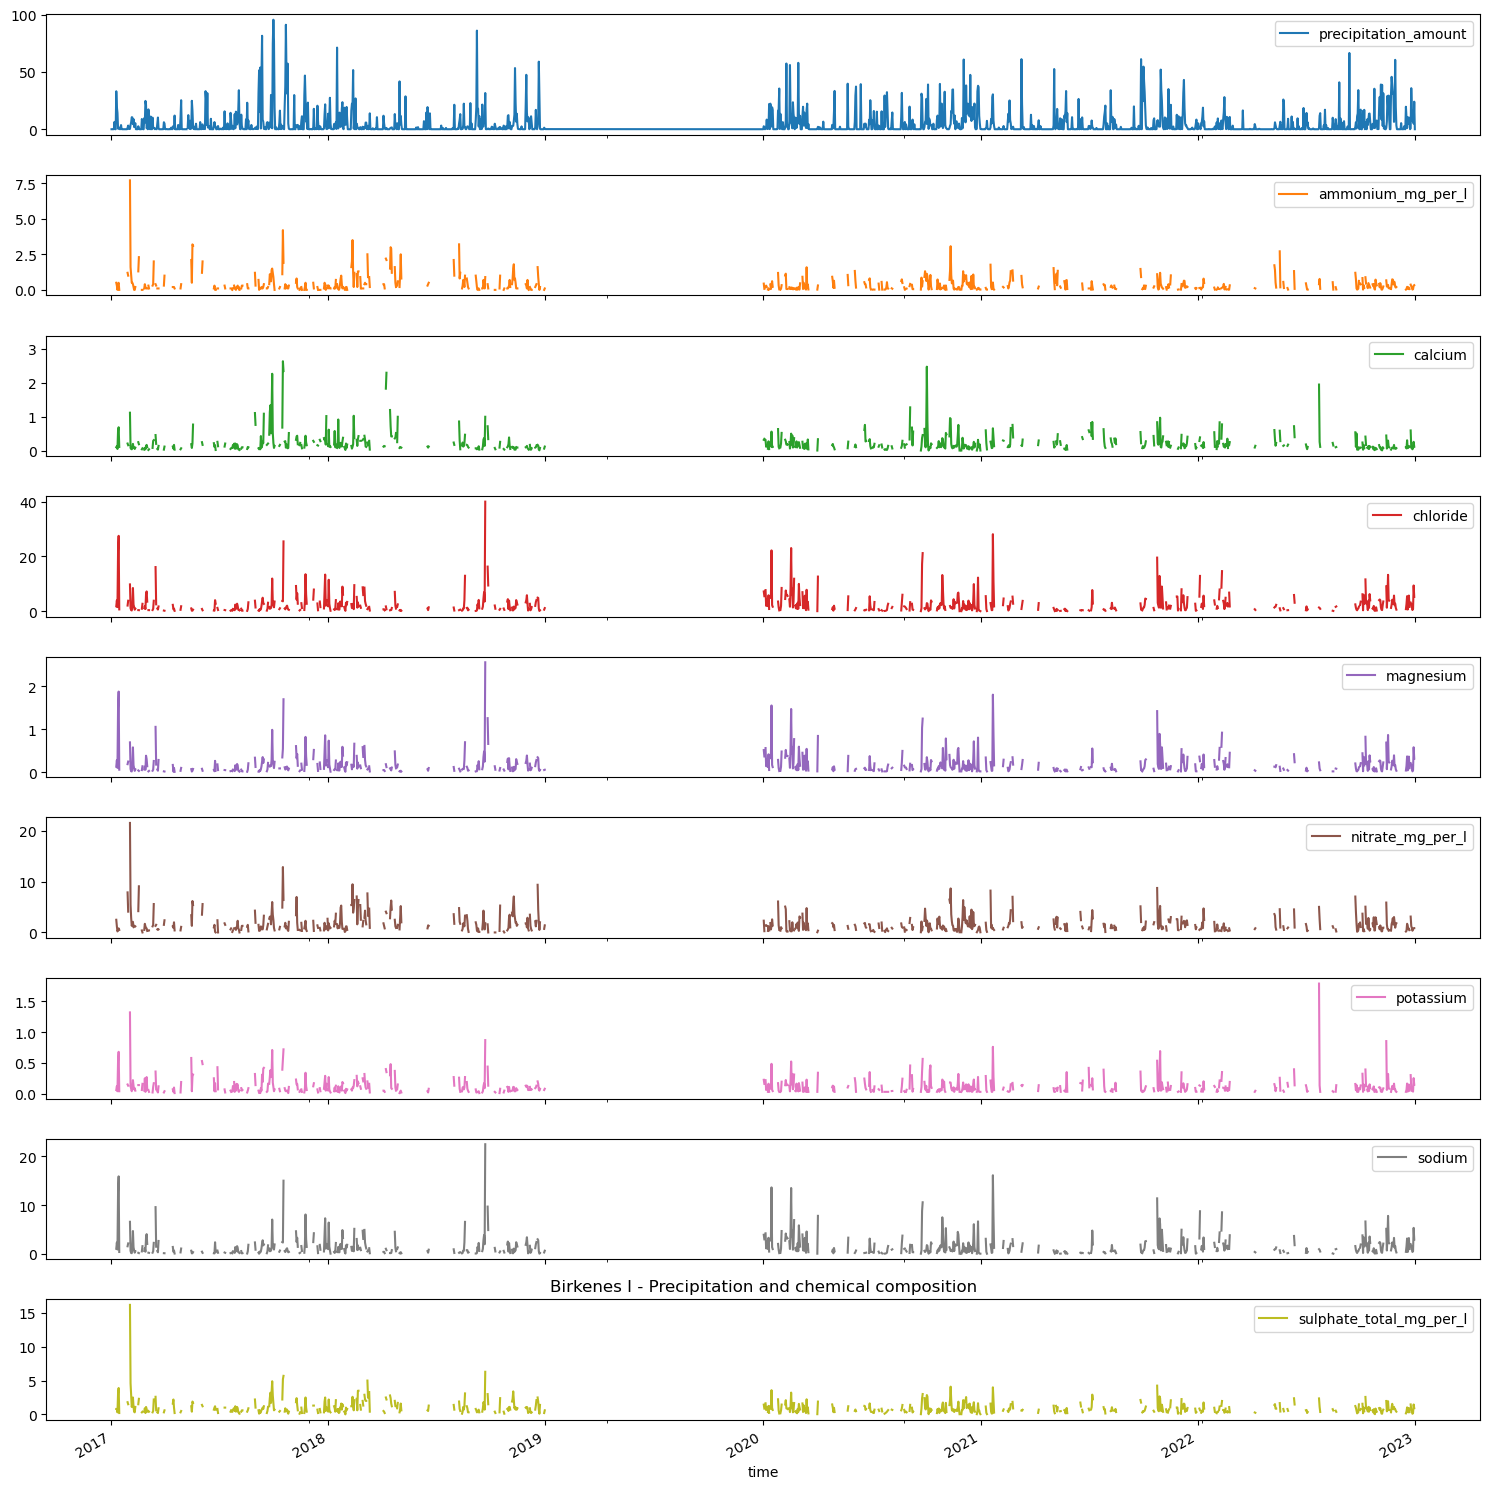

In [30]:
df.plot(subplots=True, figsize=(15, 15),title='Birkenes I - Precipitation and chemical composition')
plt.tight_layout()
plt.show()

In [28]:
# Save the dataset to a csv file
df.to_csv('{}_precip.csv'.format(ds_xr.ebas_station_name))